<a href="https://colab.research.google.com/github/javier-marti-isasi/03MAIR-Algoritmos-de-optimizacion/blob/main/Javier_Marti_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmos - Actividad guiada 2
Nombre: Javier Martí<br>
URL: https://colab.research.google.com/drive/1-c4EO9VCQ-4iF7msIqYRoSMks2UhSWXz?usp=sharing

https://github.com/javier-marti-isasi/03MAIR-Algoritmos-de-optimizacion

## Programación dinámica - Viaje por el rio

In [ ]:
import math

In [ ]:
TARIFAS = [
[0,5,4,3,999,999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#En lugar de 999 podemos usar math.inf

Estrategia:

1.   Nos apuntamos la mejor ruta para ir desde cada unos de los nodos
2.   A partir de los resultados obtenidos, descubrimos recursivamente la mejor solución de principio a fin


In [ ]:
def Precios(TARIFAS):
################################################################  
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  #vamos guardando los mejores valores y las mejores rutas
  #busco todas las posibilidades de ir a i a j y me quedo con la mejor solución de los valores intermedios
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      #recorremos los valores intermedios de i a j 
      for k in range(i, j):
        #si he encontrado ese k que cumple con el condicional, nos lo guardamos
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
           
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA


Guardamos los  nodos intermedios. Hay que solucionar los problemas intermedios. Aplicamos recursividad

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


Para ir del nodo 0 al 4 no tengo el 0, hay que pasar por el 1

In [ ]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 


print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


La ruta es:


'0,0,2,5'

##Fuerza bruta + Ramificación y poda - Problema de Asignación de tarea

Hay que asignar n tareas a n agentes, de forma que cada agente le corresponda una tarea. Se dispone de una tabla de costes: el coste pare el agente i al realizar la tarea j es cij>=0. Se busca la asignación que reduzca el coste total.


Estrategia Fuerza bruta:

1.   Definimos una función que evalúa cualquier solución parcial o final
2.   Con fuerza bruta recorremos todas las posibilidades y nos quedamos con la mejor


Estrategia Ramificación y Poda:

1.   Definimos una función que nos dice la cota inferior
2.   Definimos una función para ramificar
3.   Realizamos el esquema general, inicializamos los valores antes de efectuar el bucle

In [ ]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [ ]:
#Devuelve la asignación final o parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR
  
valor((0, 1, 2, 3),COSTES)

73

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion del 
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    #busca para un i fijo, algo que no esté asignado
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CS((0,1),COSTES)

74

In [ ]:
#Genera tantos hijos como posibilidades haya para el siguiente elemento de la tupla
#devuelve un array con los hijos que vamos a tener que explorar
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones (árbol). En cada etapa asignamos un agente (ramas).
#establecemos una estructura que nos va a ayudar a explorar (ramificar)
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  #inicializamos con un vacío
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  #de entre todos los nodos pendientes, elegimos el más prometedor (el de menor coste tenga aunque puede que no sea la mejor)
  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    #Llegamos a una solución final cuando hemos cumplido con toda la dimensión, hemos ocupado todas las posibilidades
    #Exploramos todos los nodos y descubrimos la mejor solución
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )   


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
import random

In [ ]:
#Definimos la función
#Paraboloide
f  = lambda X:      X[0]**2+X[1]**2      #Funcion x^2 + y^2
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente 2x + 2y (derivada de la función)

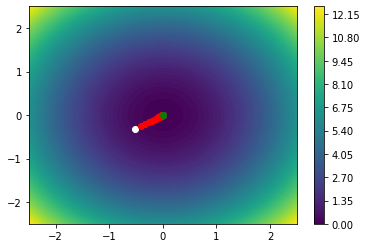

Solucion: [-1.8083047301565786e-49, -1.1328605269146394e-49] 4.553338970547971e-98


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
#definimos las curvas de nivel
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
#descenso de gradiente parte de un punto inicial
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=0.1

#Iteraciones, recalculando el punto inicial
#Lo establecemos en 500, pero podemos establecer otro criterio. Está simplificado
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


Da una solución aproximada, propio de la técnica del descenso de gradiente

##Extra: Descenso de gradiente

Aplicar Descenso de gradiente a la siguiente función objetivo:

$$f(x) = sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$

In [ ]:
#Definimos la función
#Función sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - E^y)
f  = lambda X:     np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

#Aproximamos el valor del gradiente en un punto por su definición
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(PUNTO)) / h
  return grad

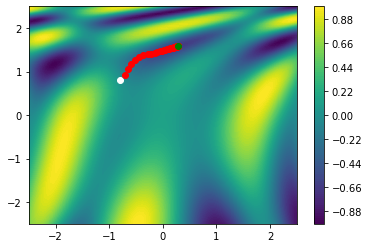

Solucion: [0.2902910349495956, 1.5884347142361563] -0.656986736920868


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
#definimos las curvas de nivel
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
#descenso de gradiente parte de un punto inicial
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=0.1

#Iteraciones, recalculando el punto inicial
#Lo establecemos en 500, pero podemos establecer otro criterio. Está simplificado
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

La función no esconvexa, por lo que no podemos asegurar que los mínimos obtenidos son globales. Tendremos que recurrir a métodos para escapar de los mínimos locales. Optaremos por ejecutar el algoritmo sobre distintas soluciones inicales.

En el sigueinte ejemplo ejecutaremos el algoritmo (solo) 10 veces y mostraremos los resultados obtenidos.

Solucion: [-0.824108567110597, -0.48805324435088737] -0.04193316242789874
Solucion: [0.29029103494959685, 1.5884347142361623] -0.6569867369208682
Solucion: [0.29029103494960473, 1.5884347142361634] -0.6569867369208681
Solucion: [2.122130375753053, 1.7179173571290531] -0.9278972992305351
Solucion: [-0.8241082877981236, -0.4880524849054565] -0.04193316108252798
Solucion: [1.0976545751494309, -2.8629649430809607] -0.9998408851237627
Solucion: [-0.824110562025232, -0.48805866848594426] -0.04193317203340903
Solucion: [1.0976545751494302, -2.8629649430809554] -0.9998408851237628
Solucion: [0.29029103494960395, 1.5884347142361606] -0.6569867369208682
Solucion: [-0.8241093151325012, -0.48805527820841454] -0.0419331660303301


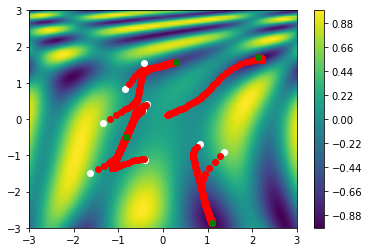

In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
#definimos las curvas de nivel
resolucion = 100 
rango=3
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

def calculo_dg(iteraciones):
  i = 0
  while i < iteraciones:
    #Generamos un punto aleatorio
    #descenso de gradiente parte de un punto inicial
    P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
    plt.plot(P[0],P[1],"o",c="white")

    #Tasa de aprendizaje
    TA=0.1

    #Iteraciones, recalculando el punto inicial
    #Lo establecemos en 500, pero podemos establecer otro criterio. Está simplificado
    for _ in range(500):
      grad = df(P)
      #print(P,grad)
      P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
      
      plt.plot(P[0],P[1],"o",c="red")
    plt.plot(P[0],P[1],"o",c="green")
    print("Solucion:" , P , f(P))
    i+=1

#Ejecutamos el algoritmo 10 veces
calculo_dg(10)
plt.show()

Efectivamente, vemos de una manera muy visual todos los mínimos locales obtenidos. 

En este ejemplo muy sencillo hemos obtenido 4 mínimos locales (aproximando los mínimos cercanos) de los cuales:
- 1 mínimo local se ha obtenido a través de 1 punto aleatorio
- 1 mínimo local se ha obtenido desde 2 puntos aleatorios
- 1 mínimo local se ha obtenido desde 3 puntos aleatorios
- 1 mínimo local se ha obtenido desde 4 puntos aleatorios

Comparando los resultados, el mínimo obtenido sería la solución:

Solucion: [1.0976545751494302, -2.8629649430809554] -0.9998408851237628

Este mínimo lo hemos obtenido con solo 10 iteraciones. Ahora calcularemos el punto mínimo obtenido con 1000 iteraciones y mostraremos el resultado.

In [ ]:
def calculo_dg_min(iteraciones):
  i = 0
  while i < iteraciones:
    #Generamos un punto aleatorio
    #descenso de gradiente parte de un punto inicial
    P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]

    #Tasa de aprendizaje
    TA=0.1

    #Inicializamos mínimo global
    min_global = math.inf

    #Iteraciones, recalculando el punto inicial
    #Lo establecemos en 500, pero podemos establecer otro criterio. Está simplificado
    for _ in range(500):
      grad = df(P)
      P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
      min_local = f(P)

      if min_local < min_global:
        min_global = min_local
        P_min = P
    i+=1
  return P_min, min_global

#Ejecutamos el algoritmo 1000 veces
print("Solucion:" , calculo_dg_min(1000))

Solucion: ([1.0976545751494309, -2.8629649430809607], -0.9999133348412449)


Solución muy próxima a la obtenida con 10 iteraciones.